In [2]:
import pandas as pd
import sklearn.metrics as metrics
import numpy as np

In [11]:
ratings = pd.read_csv("/Users/german/Desktop/second_rating/second_rating_CONSENSUS_PM.csv", sep=';')

correspondences = pd.read_csv("/Users/german/Desktop/RimProject/excels/all_participants.csv", sep=";")
correspondences["Patient"] = correspondences["participant_id"].apply(lambda val: int(val.split('-')[1]))
correspondences["Hospital_ID"] = correspondences["center_id"]
correspondences = correspondences[["Patient", "Hospital_ID"]]

ratings = pd.merge(ratings, correspondences, on="Hospital_ID", how="left")

#to_exclude = ratings.index[ratings['To_Exclude'] == True].tolist()
#print(f"{len(to_exclude)} lesions excluded.")
#ratings = ratings.drop(to_exclude)
ratings["GT"] = ratings["GT"].apply(lambda gt:  0 if gt == "-" else 1)
ratings["RimNet"] = ratings["RimNet"].apply(lambda gt:  0 if gt == "-" else 1)
ratings["Vote_M"] = ratings["Vote_M"].fillna(-1).astype(int)
ratings["Vote_P"] = ratings["Vote_P"].fillna(-1).astype(int)

ratings = ratings[["Hospital", "Patient", "Lesion_ID", "GT", "RimNet", "Result", "Bad_Segmentation", "Consensus", "Vote_P", "Vote_M", "Visibility_P", "Visibility_M", "Quality_P", "Quality_M", "Comment", "Comment_P", "Comment_M"]]

#print(ratings.loc[(ratings["Result"] == "FN") & ((ratings["Consensus"] == -1) | (ratings["Bad_Segmentation"] == 1))])
#print(len(ratings.index))
#print(100 * len(ratings.loc[(ratings["Consensus"] == -1) | (ratings["Bad_Segmentation"] == 1)].index) / len(ratings.index))

# We EXCLUDE cases of bad segmentations
ratings = ratings.loc[(ratings["Consensus"] != -1) & (ratings["Bad_Segmentation"] == 0)]

ratings_FP = ratings[ratings["Result"] == "FP"]
#print(len(ratings_FP.index))
ratings_FN = ratings[ratings["Result"] == "FN"]
#print(len(ratings_FN.index))


In [12]:
def get_results(df):
    total = len(df.index)
    #print(list(zip(list(df["Vote_M"]), list(df["Vote_P"]))))
    kappa = metrics.cohen_kappa_score(df["Vote_M"], df["Vote_P"])
    need_consensus = len(df[df["Vote_P"] != df["Vote_M"]].index)
    #convinced = df[(df["GT"] != df["RimNet"]) & (df["RimNet"] == df["Vote_M"]) & (df["Vote_M"] == df["Vote_P"])]
    convinced = df[(df["Consensus"] == df["RimNet"])]
    same_as_gt = len(df[(df["GT"] == df["Vote_M"]) & (df["GT"] == df["Vote_P"])].index)
    were_convinced = len(convinced.index)
    print(f"TOTAL: {total}")
    print(f"Kappa: {kappa:.2f}")
    print(f"Convinced: {were_convinced} ({100*were_convinced/total:.1f}%)")
    print(f"Need consensus (1/2 convinced): {need_consensus} ({100*need_consensus/total:.1f}%)")
    print(f"Inter-rater agreement: {100-100*need_consensus/total:.1f}%")
    #print(f"Not convinced: {same_as_gt} ({100*same_as_gt/total:.1f}%)")
    return convinced


def get_results_individual(df, who):
    total = len(df.index)
    #print(list(zip(list(df["Vote_M"]), list(df["Vote_P"]))))
    #kappa = metrics.cohen_kappa_score(df["GT"], df[who])
    convinced = df[(df["GT"] != df["RimNet"]) & (df["RimNet"] == df[who])]
    same_as_gt = len(df[(df["GT"] == df[who])].index)
    were_convinced = len(convinced.index)
    #print(f"TOTAL: {total}")
    #print(f"Kappa: {kappa:.2f}")
    print(f"Convinced: {were_convinced} ({100*were_convinced/total:.1f}%)")
    #print(f"Not convinced: {same_as_gt} ({100*same_as_gt/total:.1f}%)")
    return convinced

In [13]:
print("> FN")
get_results_individual(ratings_FN, "Vote_P")
get_results_individual(ratings_FN, "Vote_M")
print("\n> FP")
get_results_individual(ratings_FP, "Vote_P")
get_results_individual(ratings_FP, "Vote_M")
1

> FN
Convinced: 4 (11.8%)
Convinced: 5 (14.7%)

> FP
Convinced: 13 (52.0%)
Convinced: 13 (52.0%)


1

In [17]:
print("> FN")
get_results(ratings_FN)
print("\n> FP")
get_results(ratings_FP)

print("")

> FN
TOTAL: 34
Kappa: 0.36
Convinced: 4 (11.8%)
Need consensus (1/2 convinced): 5 (14.7%)
Inter-rater agreement: 85.3%

> FP
TOTAL: 25
Kappa: 0.68
Convinced: 14 (56.0%)
Need consensus (1/2 convinced): 4 (16.0%)
Inter-rater agreement: 84.0%



In [20]:
#ratings_FN[ratings_FN["Vote_P"] != ratings_FN["Vote_M"]]
ratings_FP

,Hospital,Patient,Lesion_ID,GT,RimNet,Result,Bad_Segmentation,Consensus,Vote_P,Vote_M,Visibility_P,Visibility_M,Quality_P,Quality_M,Comment,Comment_P,Comment_M
0,CHUV,13,2022,0,1,FP,0,1,1,1,3.0,2.0,4.0,4.0,NaN,NaN,"bordeline with a nodular hypointense lesion, b..."
11,CHUV,39,2036,0,1,FP,0,1,1,1,2.0,3.0,3.0,3.0,NaN,hypointense parenchima but visible rim,NaN
14,CHUV,46,2006,0,1,FP,0,1,1,1,2.0,2.0,3.0,3.0,NaN,NaN,NaN
16,CHUV,47,2056,0,1,FP,0,0,0,0,NaN,NaN,1.0,2.0,Rim intrusion,noisy scan in general,small les to be clearly judged
19,CHUV,49,2034,0,1,FP,0,1,1,0,1.0,NaN,3.0,3.0,NaN,NaN,very subtle
20,CHUV,49,2057,0,1,FP,0,0,0,0,NaN,NaN,4.0,3.0,NaN,NaN,NaN
22,CHUV,51,2013,0,1,FP,0,0,1,0,3.0,NaN,2.0,NaN,NaN,bordering deep gray structure with hyperintens...,very tricky in part within the basal ganglia
25,Basel,64,2024,0,1,FP,0,0,0,0,NaN,NaN,3.0,4.0,NaN,NaN,NaN
26,Basel,64,2029,0,1,FP,0,0,0,0,NaN,NaN,2.0,4.0,NaN,large confluent lesion sometimes with hypointe...,NaN
27,Basel,64,2057,0,1,FP,0,1,0,1,NaN,4.0,1.0,4.0,NaN,susceptibility artefacts inside lesion parench...,"rim clear on slice 256, 257"


In [48]:
len(ratings_FN.loc[((~ratings_FN["Quality_P"].isna()) & (ratings_FN["Quality_P"] <= 2)) | ((~ratings_FN["Quality_M"].isna()) & (ratings_FN["Quality_M"] <= 2))].index)


17

In [38]:
import seaborn as sns

ratings_FN.
prova_P = ratings_FN.loc[~ratings_FN["Visibility_P"].isna()]
prova_M = ratings_FN.loc[~ratings_FN["Visibility_M"].isna()]

prova_M

,Hospital,Patient,Lesion_ID,GT,RimNet,Result,Bad_Segmentation,Consensus,Vote_P,Vote_M,Visibility_P,Visibility_M,Quality_P,Quality_M,Comment,Comment_P,Comment_M
2,CHUV,29,1000,1,0,FN,0,1,1,1,3.0,3.0,1.0,3.0,Air artifact,strong susceptibility artefact,maybe a bit of temporal lobe susceptibility ar...
3,CHUV,29,1007,1,0,FN,0,1,1,1,1.0,3.0,3.0,4.0,NaN,NaN,lesion at the WM-GM junction
4,CHUV,39,1004,1,0,FN,0,1,1,1,1.0,3.0,1.0,3.0,NaN,strong susceptibility artefact (but clear rim ...,triangular leukocortical les
5,CHUV,39,1013,1,0,FN,0,1,1,1,3.0,3.0,2.0,3.0,NaN,susceptibility artefact (but clear rim visible...,triangular leukocortical les
6,CHUV,39,1035,1,0,FN,0,1,1,1,2.0,3.0,2.0,3.0,NaN,susceptibility artefact (but clear rim visible...,leukocortical lesion
17,CHUV,48,1000,1,0,FN,0,1,1,1,1.0,2.0,3.0,3.0,NaN,NaN,NaN
18,CHUV,49,1000,1,0,FN,0,1,1,1,1.0,2.0,2.0,3.0,NaN,NaN,NaN
21,CHUV,51,1018,1,0,FN,0,1,1,1,2.0,3.0,2.0,3.0,NaN,susceptibility artefacts inside lesion parench...,leukocortical lesion
24,CHUV,54,1000,1,0,FN,0,1,1,1,1.0,2.0,3.0,3.0,NaN,NaN,NaN
35,Basel,78,1002,1,0,FN,0,1,1,1,4.0,3.0,3.0,4.0,NaN,NaN,lesion between ventricle and caudate (usual pr...


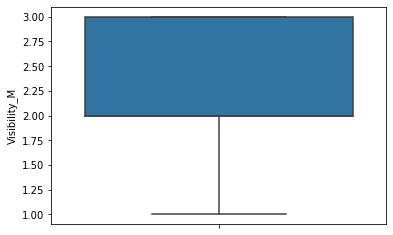

In [36]:

sns.boxplot(data=prova_M, y="Visibility_M")